# Advanced `ComputationFrame` tools
This section of the documentation contains some more advanced `ComputationFrame`
topics.

## Set-like and graph-like operations on `ComputationFrame`s
A CF is like a "graph of sets", where the elements of each set are either `Ref`s
(for variables) or `Call`s (for functions). As such, it supports both natural
set-like operations applied node/edge-wise, and natural operations using the
graph's connectivity:

- **union**: given by `cf_1 | cf_2`, this takes the union of the two computation
graphs (merging nodes/edges with the same names), and in case of a merge, the
resulting set at the node is the union of the two sets of `Ref`s or `Call`s.
- **intersection**: given by `cf_1 & cf_2`, this takes the intersection of the
two computation graphs (leaving only nodes/edges with the same name in both), 
and the set at each node is the intersection of the two corresponding sets. 
- **`.downstream(varnames)`**: restrict the CF to computations that are
downstream of the `Ref`s in chosen variables
- **`.upstream(varnames)`**: dual to `downstream`

Consider the following example:

In [1]:
from mandala._next.imports import *
storage = Storage()

@op
def inc(x): return x + 1

@op
def add(y, z): return y + z

@op
def square(w): return w ** 2

@op
def divmod_(u, v): return divmod(u, v)

with storage:
    xs = [inc(i) for i in range(5)]
    ys = [add(x, z=42) for x in xs] + [square(x) for x in range(5, 10)]
    zs = [divmod_(x, y) for x, y in zip(xs, ys[3:8])]

We have a "middle layer" in the computation that uses both `add` and `square`.
We can get a shared view of the entire computation by taking the union of the
expanded CFs for these two ops:

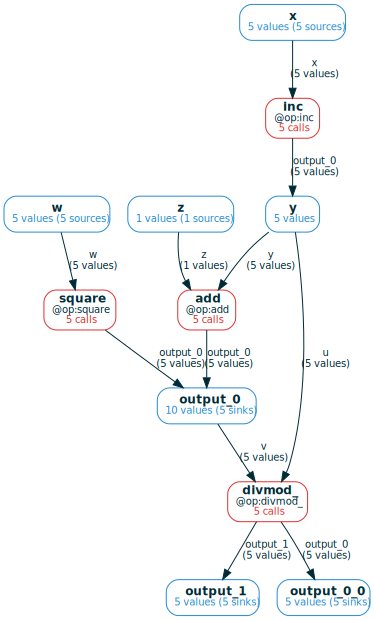

In [2]:
cf = (storage.cf(add) | storage.cf(square)).expand_all()
cf.draw(verbose=True)

## Selection
TODO